
___
# Linear Regression Project

## Problem Statement
An Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. 


## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
customers = pd.read_csv('Ecommerce Customers')

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis


Use jointplots to individually compare the 'Time on Website' with 'Yearly Amount Spent', as well as 'Time on App' and 'Yearly Amount Spent', in order to determine the correlation. 

In [94]:
sns.set_palette("PuBuGn_r_d")
sns.set_style("whitegrid")

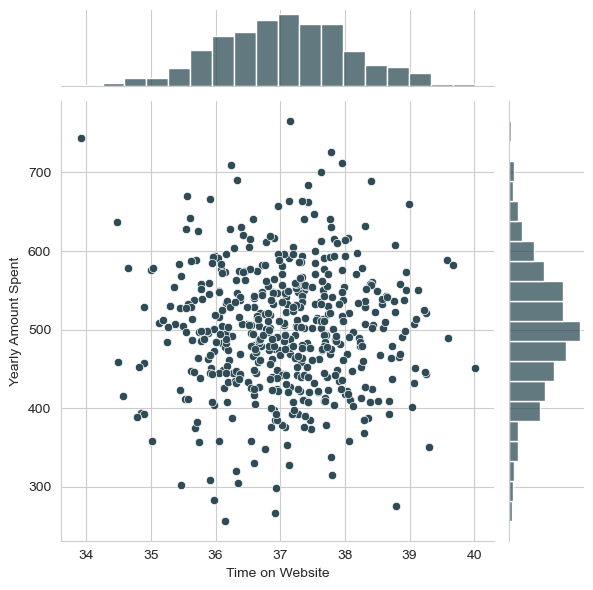

In [95]:
sns.jointplot(data=customers, x='Time on Website', y='Yearly Amount Spent')

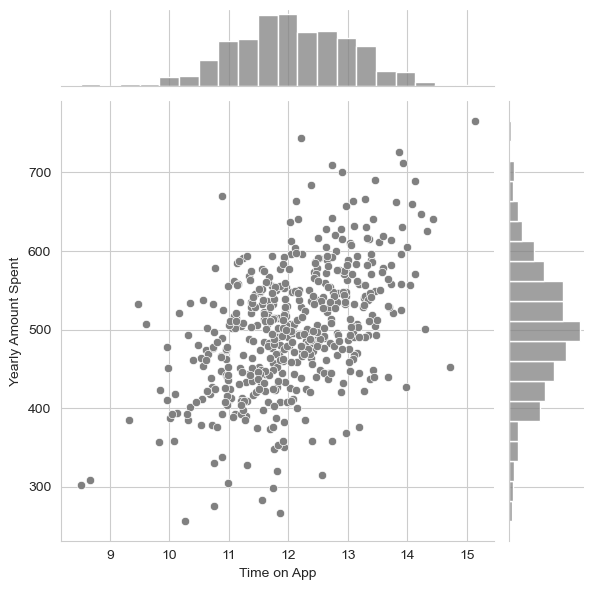

In [97]:
sns.jointplot(data=customers, x='Time on App', y='Yearly Amount Spent', color = 'grey',)

Use a 2D hex bin plot comparing Time on App and Length of Membership.

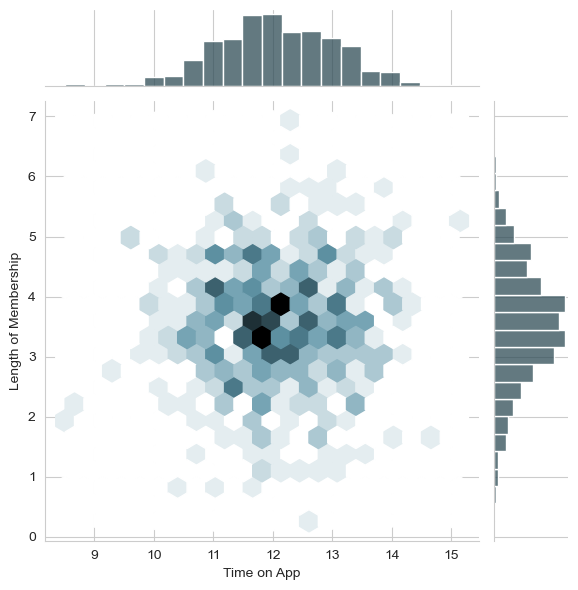

In [98]:
sns.jointplot(data=customers, 
              x='Time on App',
              y='Length of Membership',
              kind = 'hex'
         )

Let's explore these types of relationships across the entire data set. Use [pairplot]

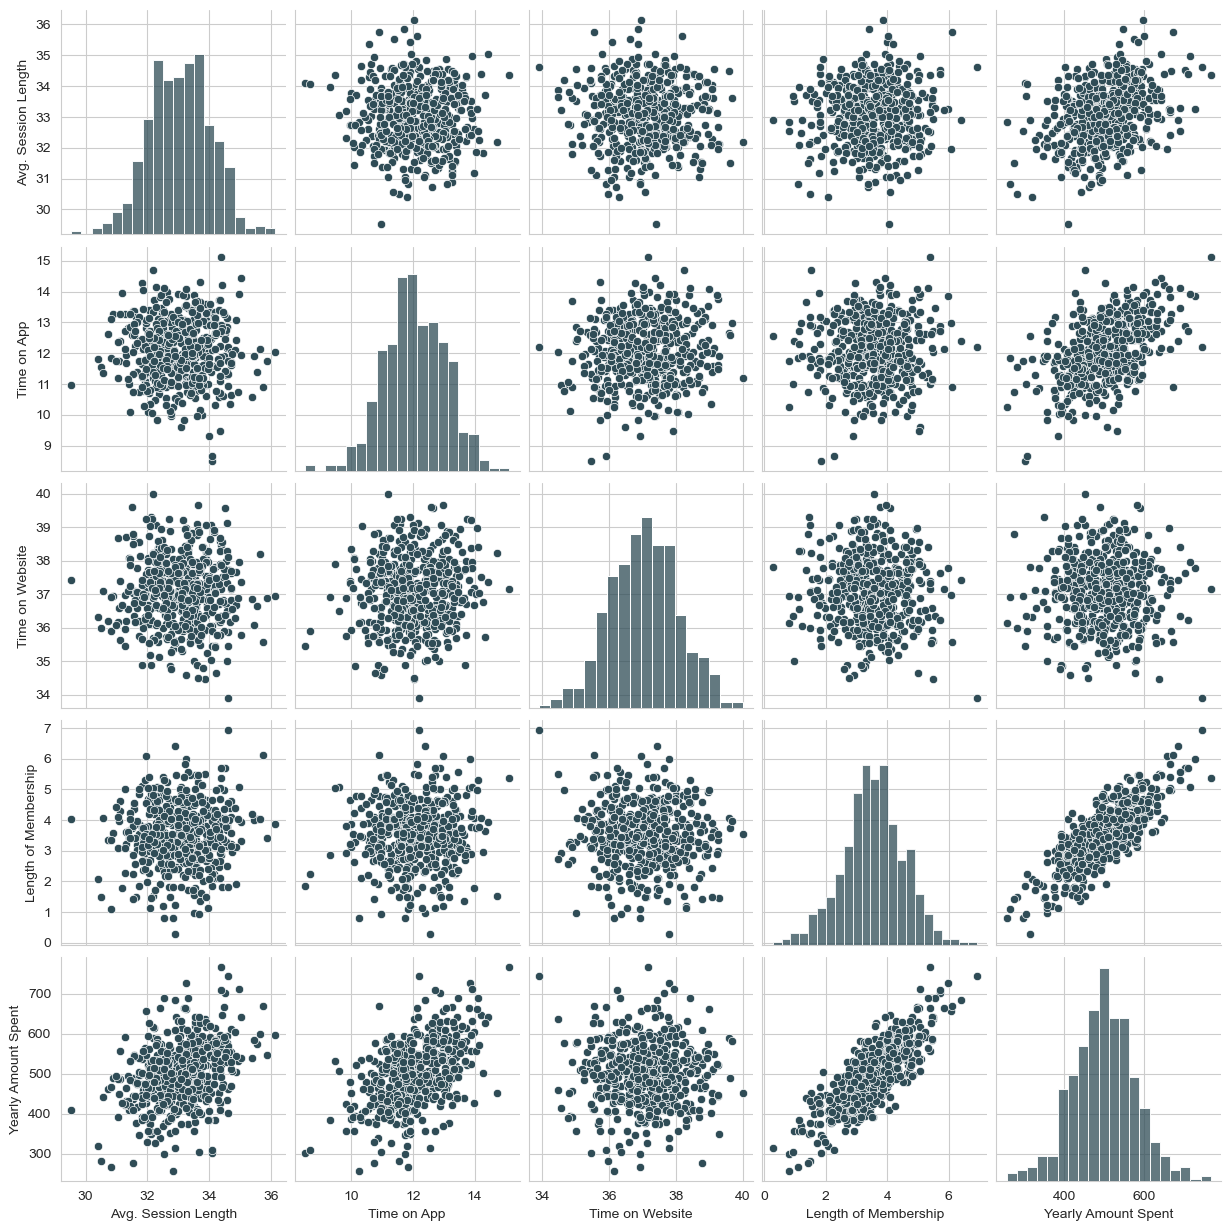

In [99]:
sns.pairplot(data=customers)

**Inference:**

Based off the plot, it appears that most correlated feature with 'Yearly Amount Spent' is 'Length of Membership'. As the length of membership years increases, there is a higher likelihood of spending more money over time.

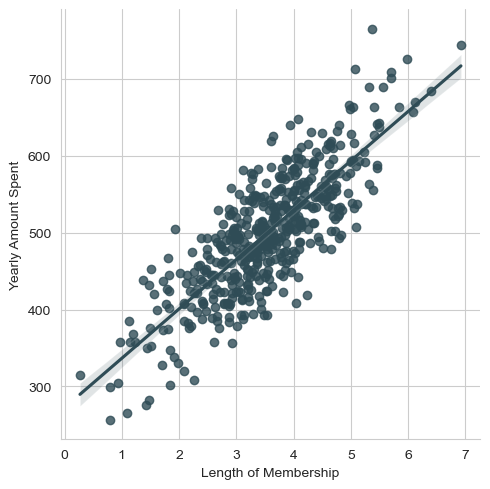

In [101]:
sns.lmplot(data=customers, x='Length of Membership', y='Yearly Amount Spent')

## Training and Testing Data

In [103]:
from sklearn.model_selection import train_test_split

In [105]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [106]:
X = customers[['Avg. Session Length', 'Time on App', 
               'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

In [109]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train,y_train)

LinearRegression()

In [20]:
print('Coefficients:', lm.coef_)

Coefficients: [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data

In [21]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Values')

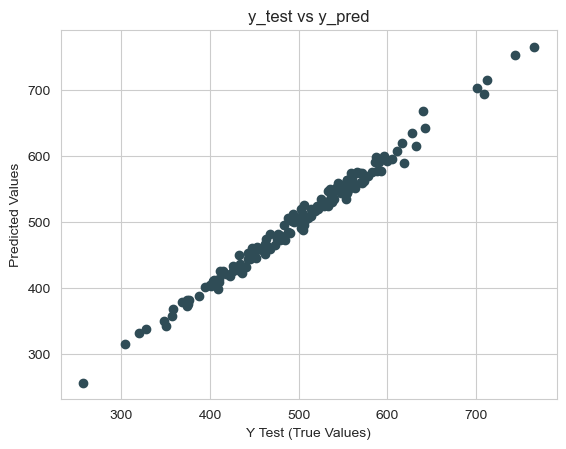

In [111]:
plt.scatter(y_test,predictions)
plt.title('y_test vs y_pred')
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

## Evaluating the Model

In [23]:
from sklearn import metrics

In [24]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMAE:', np.sqrt(metrics.mean_absolute_error(y_test, predictions)))

MAE: 7.2281486534308295
MSE: 79.81305165097444
RMAE: 2.6885216483098717


In [25]:
metrics.explained_variance_score(y_test,predictions)

0.9890771231889606

## Residuals

Text(0.5, 1.0, 'Residuals')

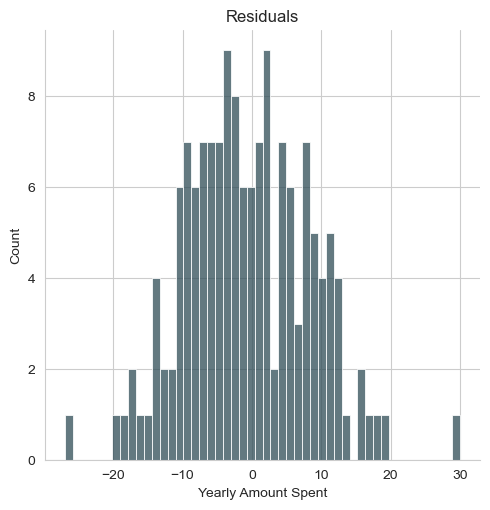

In [114]:
sns.displot((y_test-predictions), bins=50)
plt.title('Residuals')

## Conclusion

In [59]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**Correlation Interpretation:**

- Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with a \$25.98 increase in yearly amount spent.
- Holding all other features fixed, a 1 unit increase in Time on App is associated with a \$38.59 increase in yearly amount spent.
- Holding all other features fixed, a 1 unit increase in Time on Website is associated with a \$0.19 increase in yearly amount spent.
- Holding all other features fixed, a 1 unit increase in Length of Membership is associated with a \$61.28 increase in yearly amount spent.

Based on the coefficient and the data in our model, we can draw two different conclusions:

1. Considering the coefficient and the data, it suggests that the website requires more improvements to catch up to the mobile app.
2. Alternatively, we can conclude that we should allocate more resources to further develop the app since it is already performing significantly better.

To make an informed decision on the appropriate focus, we would need additional information regarding the cost implications of these decisions.